# Introduction to Programming and Numerical Analysis - Inaugural Project Spring 2020

**Team:** Kongerækken

**Members:** Frederik Degn Pedersen (qwn116) & Christian Brauer Johanssen (sjk185)

**Imports and set magics:**

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use("seaborn")

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# Question 1

We consider a consumer solving the following maximisation problem

$$ 
\begin{aligned}
U^* = U(c^*,l^*) & = \text{arg}\max_{c,l}\log(c)-\nu\frac{l^{1+\frac{1}{\epsilon}}}{1 + \frac{1}{\epsilon}}\\
& \text{s.t.}\\
x & = m+wl-[\tau_{0}wl + \tau_{1} \max \{wl-\kappa, 0\}]\\
c &\in [0, x]\\
l &\in [0, 1],
\end{aligned} 
$$

where $c$ is consumption, $l$ is labour supply, $m$ is cash-on-hand, $w$ is the wage rate, $\tau_0$ is the standard labour income tax, $\tau_1$ is the top bracket labour income tax, $\kappa$ is the cut-off for the top labour income bracket, $x$ is total resources, $\nu$ scales the disutility of labour, and $\epsilon$ is the Frisch elasticity of labour supply.

Utility is monotonically increasing in consumption, which implies that

$$
\begin{align}
c^* & = x
\end{align}
$$

Thus, inserting for c and subsequently for x yields the following univariate maximisation problem with only one constraint: 

$$ 
\begin{aligned}
U^* & = \text{arg}\max_{l}\log(m+wl-[\tau_{0}wl + \tau_{1} \max \{wl-\kappa, 0\}])-\nu\frac{l^{1+\frac{1}{\epsilon}}}{1 + \frac{1}{\epsilon}}\\
& \text{s.t. }l \in [0, 1]
\end{aligned} 
$$

The above utility function as well as the optimising function used to solve the maximisation problem are defined in the module.

In [2]:
# a. set parameters
m = 1
nu = 10
eps = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4
w = 1

# b. compute optimal labour and consumption
l_star, c_star, u_star = inauguralproject.u_optimiser(eps,kappa,nu,m,tau0,tau1,w)

# c. print solution for assigned parameter values
print(f'The agent will choose optimal labour = {l_star:.2f}, which implies optimal consumption = {c_star:.2f} and utility = {u_star:.2f}')

The agent will choose optimal labour = 0.40, which implies optimal consumption = 1.24 and utility = 0.17


# Question 2

First we create a numpy array of wage values between 0.5 and 1.5 and two corresponding empty arrays in which to append the values for labour and consumption choice. Next we loop our user defined optimiser function over the wage values and store the results in the initially empty numpy arrays l_vals and c_vals. Finally we plot the two figures using a function defined in the corresponding module.

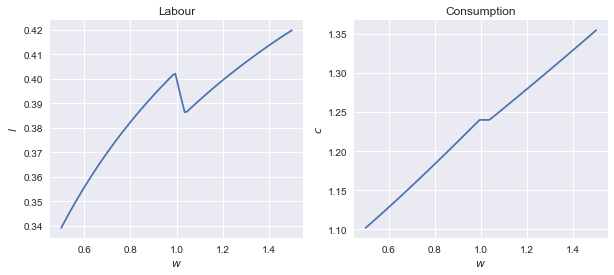

In [8]:
# a. create array of w and container for values of l and c
N = 100
w = np.linspace(0.5,1.5,num=N)
l_vals = np.empty(N)
c_vals = np.empty(N)

# b. loop the optimiser over the w array
for i,wi in enumerate (w): 
    lc = inauguralproject.u_optimiser(eps,kappa,nu,m,tau0,tau1,wi)
    
    l_vals[i] = lc[0]
    c_vals[i] = lc[1] 

# c. plot the figure    
inauguralproject.two_figures(w, l_vals, "Labour", "$w$", "$l$", w, c_vals, "Consumption", "$w$", "$c$")

# Question 3

In the module, we define a function which calculates the total tax revenue given parameters and the previously defined utility function.

In [4]:
# set parameter values
seed = 97
size = 10000
low = 0.5
high = 1.5

# compute total tax revenue
total_tax_rev = inauguralproject.tax_revenue(seed,size,low,high)

print(f'The total tax revenue is {total_tax_rev:.2f}')

The total tax revenue is 1633.01


# Question 4

We merely run the function from question 4 again with $\epsilon = 0.1$:

In [5]:
# run tax_revenue function again with new value of eps
total_tax_rev = inauguralproject.tax_revenue(seed,size,low,high,eps=0.1)

print(f'The total tax revenue with Frisch elasticity = 0.1 is {total_tax_rev:.2f}')

The total tax revenue with Frisch elasticity = 0.1 is 3200.94


# Question 5

In this question, we return to $\epsilon = 0.3$. We first define an objective function in order to subsequently maximize the tax revenue for the parameters in question. 

In [6]:
# list of parameters
params = [tau0,tau1,kappa]

# objective function
def objective_tax(params,seed,size,low,high):
    """ 
    Objective function version of total tax revenue. Params is a list that contains [t0,t1,kappa].
    See docstring of total_tax_rev for input description of remaining variables. 
    
    """
    return -(inauguralproject.tax_revenue(seed,size,low,high,tau0=params[0],tau1=params[1],kappa=params[2]))

In [7]:
# initial guess
init_guess = [0.4,0.1,0.4] # same as assignment text

# solve for optimal tax parameters
tax_params = optimize.minimize(objective_tax,x0=init_guess,method='SLSQP',
                  args=(seed,size,low,high), bounds= [(0,1),(0,1),(0,1)])

# unpack and print solution
tau0_star = tax_params.x[0]
tau1_star = tax_params.x[1]
kappa_star = tax_params.x[2]

print(f'The optimal standard tax is = {tau0_star:.4f}')
print(f'The optimal top bracket tax is = {tau1_star:.4f}')
print(f'The optimal cut off for top bracket tax is = {kappa_star:.4f}')
print(f'Expected optimal total tax revenue is {-tax_params.fun:.2f}')

The optimal standard tax is = 0.7855
The optimal top bracket tax is = 0.0000
The optimal cut off for top bracket tax is = 0.0010
Expected optimal total tax revenue is 2470.43


# Conclusion

In this assignment we have solved a consumer utility maximisation problem with respect to consumption and labour choice. When plotting optimal consumption and labour choices for a wage range between 0.5 and 1.5, we observe that there is a kink in the labour supply curve (i.e. continuity is violated, which is the reason why the problem cannot be solved analytically). Moreover, in a small interval around $w = 1$, consumption is constant and wage increases merely lead to reduced labour supply. This is a consequence of the top income bracket labour tax being effective from the moment where income ($w_i l^*$) exceeds the cutoff value ($\kappa=0.4$).

From question 3 and 4, we can conclude that when the Frisch elasticity of labour decreases, the tax revenue increases. This is because labour supply becomes more inelastic, which implies that other things equal the agents are willing to supply more labour (in the limit they supply their whole time endowment) for a given wage rate. A larger labour supply is equivalent with a larger tax base. 

At last, we find that for the politician to maximize the expected revenue, she should discard the top bracket tax and just increase standard income tax to 79%. How about that for a Laffer curve. 